# url: https://blog.kikagaku.co.jp/decision-tree-visualization/

# 【決定木とは】機械学習がどう分類しているのか可視化してみた

機械学習を学習し始めた時、このような疑問を抱いたことはないでしょうか。

    色々なアルゴリズム（ロジスティック回帰や決定木、サポートベクターマシン等）を学習したけど、結局どれを使えばいいのだろう…?

    色々なアルゴリズムを試してみたが精度が似ていた時、どれを採用したらいいのだろう…?

上記は、私自身が機械学習を学んでいた時に感じた疑問です。これらの疑問を解決するには、各アルゴリズムについて理解を深める必要があり、そのためには数学的な理論を理解する必要があります。

しかし、数学が苦手な方にとっては数式を見ても何も伝わってこないどころか、机から離れてしまう要因になってしまっているかもしれません。

そこで今回は、数式なしでアルゴリズムの理解を深めるために、アルゴリズムの挙動を可視化してみます！少しでも読者の皆様の理解の助けとなれば幸いです。

 補足
本記事では機械学習アルゴリズムの内、決定木を扱います。決定木は分類と回帰どちらにも使用可能ですが、今回は分類手法として主に扱います。

## 決定木とは
決定木 (dicision tree)とは、木構造（樹形図）を用いてデータを分析する手法です。以下の図を御覧ください。

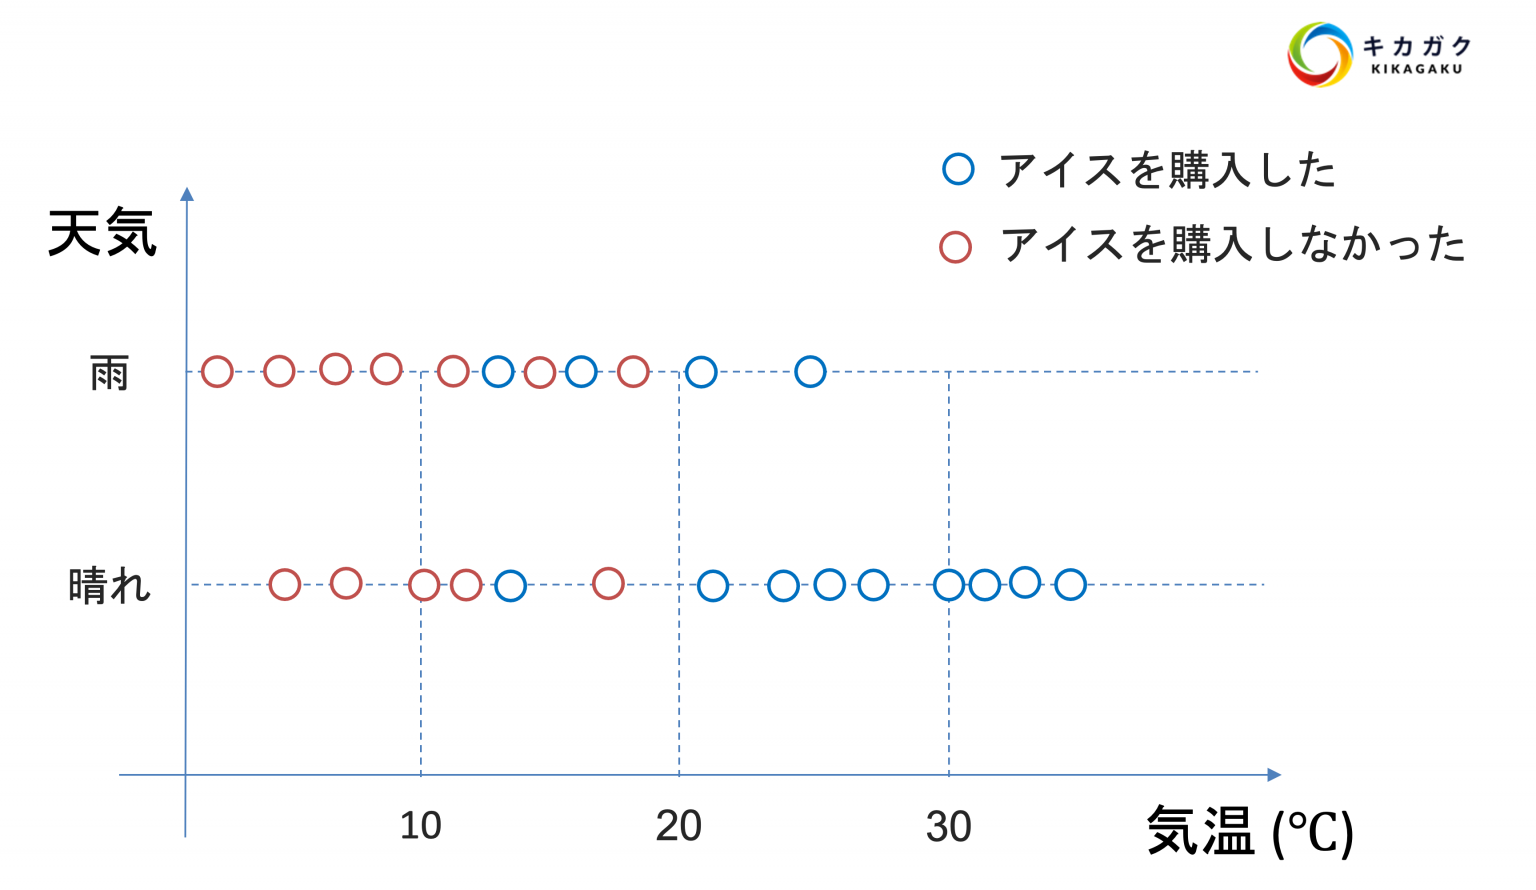

図のようにその日の気温と天気が晴れか雨かを表すデータがあり、各データに対してアイスクリームを買ったかどうかといった答えが与えられています。そして、アイスクリームを買った場合と買わなかった場合の分岐点を見つけ、以下のような樹形図を作成します。



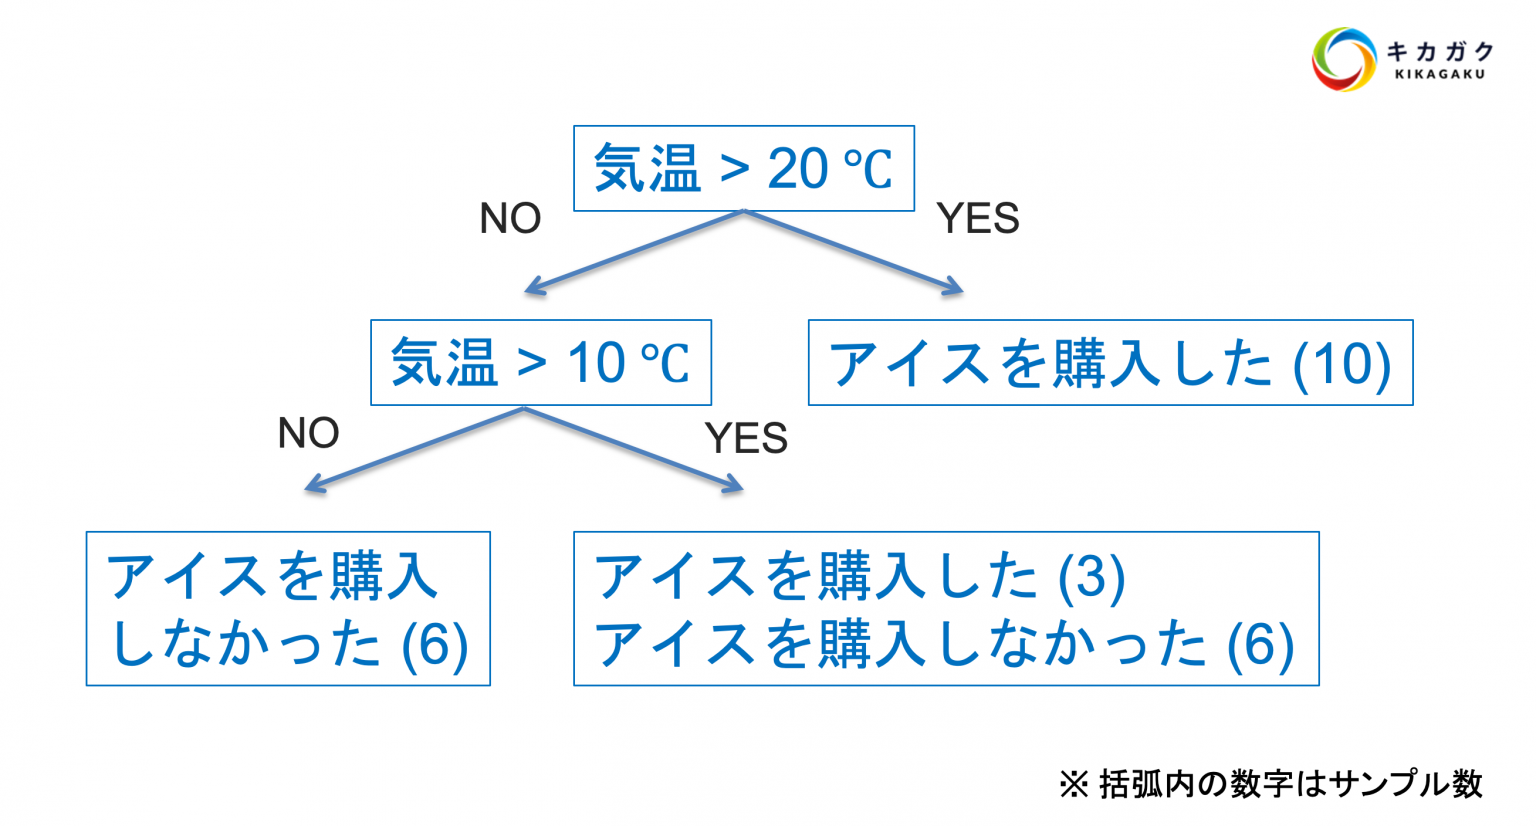

上記の樹形図を、データを使って自動的に作成してくれるのが決定木です。それでは決定木の挙動を可視化してみましょう。

## ライブラリやモジュールのインポート
まず始めに、今回の実装に使用するライブラリやモジュールをインポートしておきましょう。

In [1]:
import numpy as np # 多次元配列用の数値演算モジュール
import matplotlib.pyplot as plt # グラフ等の描画用モジュール
from matplotlib.colors import ListedColormap # 描画時のカラー指定に使用
from sklearn.datasets import make_moons # サンプルのデータセット
from sklearn.model_selection import train_test_split # データを学習用とテスト用に分割する関数
from sklearn.tree import DecisionTreeClassifier # 決定木（分類）

本記事の実装では、上記のモジュール等を使用します。本記事作成時の Python やモジュール等のバージョンは以下です。

    Python : 3.7.12
    NumPy : 1.21.2
    Matplotlib : 3.4.3
    scikit-learn : 1.0

## データの準備
今回は scikit-learn のサンプルデータセットである make_moons を使用します。

In [2]:
# データの準備
moons = make_moons(n_samples=200, noise=0.1, random_state=0)
x = moons[0] # 説明変数を取得
t = moons[1] # 目的変数を取得

make_moons() 関数を使用することで月の形のようなデータを作成できます。作成するサンプル数は n_samples という引数で指定できます。またデータを生成する際に乱数が絡むため、再現性を確保するために random_state=0 も指定しておきましょう。

make_moons() で作成したデータを可視化してみましょう。データの可視化には matplotlib の plot() 関数を使用します。



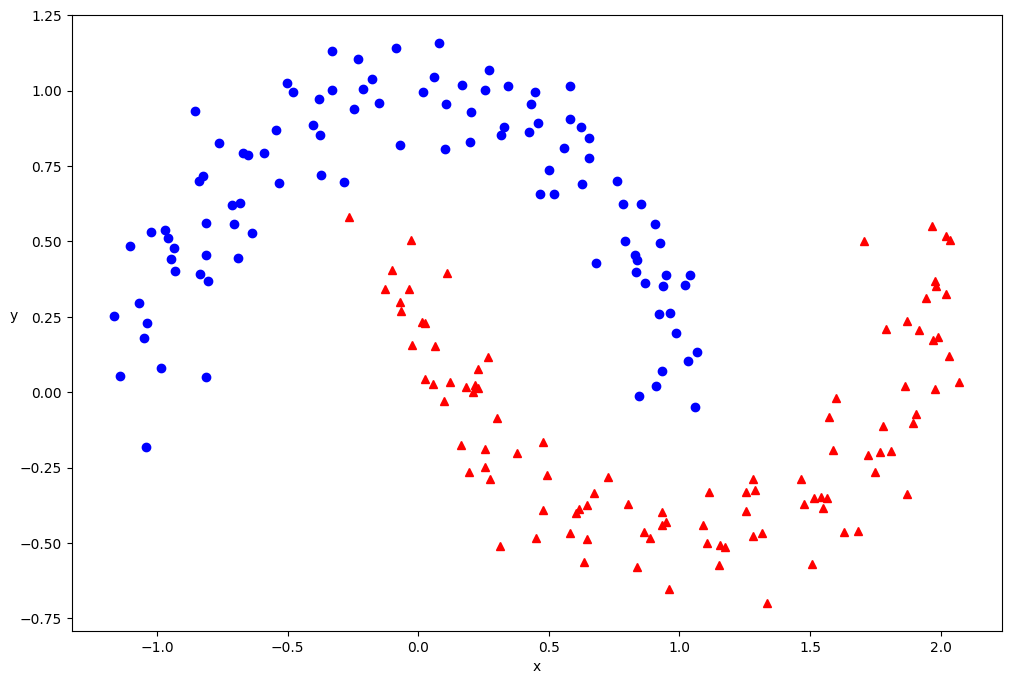

In [3]:
# データの可視化
def plot_dataset(x, t):
    plt.plot(x[:, 0][t==0], x[:, 1][t==0], 'bo') # 目的変数が 0 のデータを可視化
    plt.plot(x[:, 0][t==1], x[:, 1][t==1], 'r^') # 目的変数が 1 のデータを可視化
    plt.xlabel('x') # x 軸方向に x を表示
    plt.ylabel('y', rotation=0) # y 軸方向に y を表示

# moons を可視化
plt.figure(figsize=(12, 8)) # 描画範囲のサイズを指定
plot_dataset(x, t)

上図のデータを、決定木を用いて分類してみましょう。まずはデータを学習用とテスト用に分割します。なぜ学習用とテスト用に分割する必要があるのかわからない方は以下の記事の「学習用データセットとテスト用データセットへ分割」を参考にしてください。

In [4]:
# 学習用とテスト用に分割
x_train, x_test, t_train, t_test = train_test_split(x, t,
                                                     stratify=t,
                                                     random_state=0)

上記のコードにより、make_moons()関数で用意したデータを学習用とテスト用に分割できました。stratify=t と指定することで、学習用データとテスト用データで目的変数（0 と 1）の割合が均等になるように分割できます。

またデータを分割する際、上から順番に取り出すのではなくランダムにデータを取り出すため、ランダム性（乱数）を固定するために random_state=0 を入れて再現性を確保しています。

## モデルの定義
それでは、学習用のデータを使用し、決定木を学習させましょう。決定木は scikit-learn の DecisionTreeClassifier() クラスで使用可能です。

まずはクラスをインスタンス化し、tree_2 という変数にインスタンス化したもの（オブジェクト）を格納しておきましょう。

In [5]:
# モデルの定義
tree_2 = DecisionTreeClassifier(max_depth=2, random_state=0)

また、今回 DecisionTreeClassifier() の引数にて、max_depth=2 を設定しています。この引数を指定することにより、木構造が最大 2 段階までしか作成されなくなります。

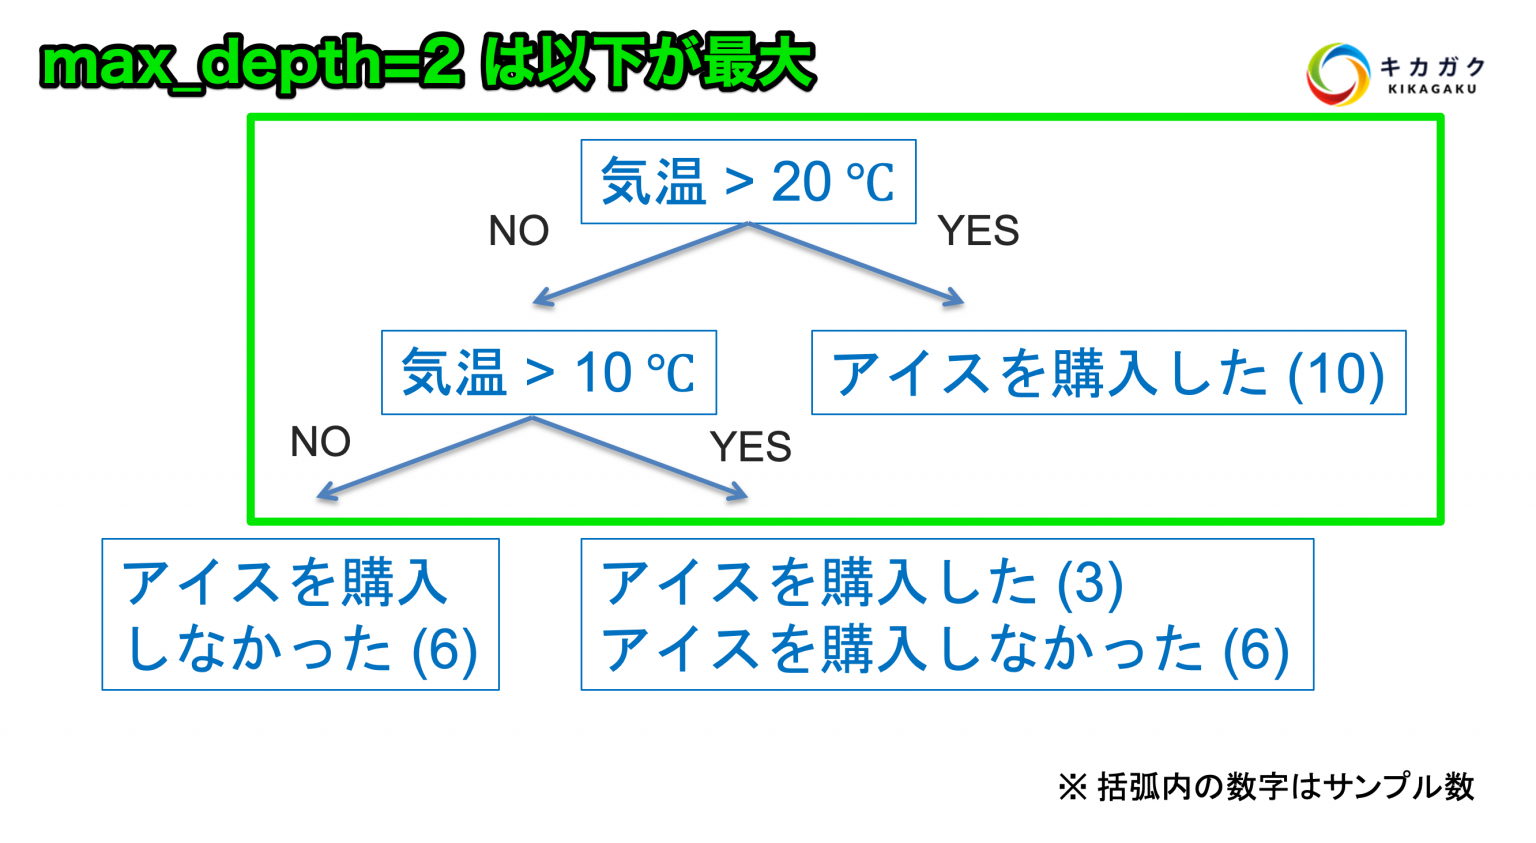

後程、max_depth の値を変えた際の挙動の違いも確認してみましょう。

## モデルの学習
それでは決定木の学習を行います。学習には、学習用データである x_train と t_train を使用します。また学習には、オブジェクトの fit() メソッドを使用します。

In [6]:
# モデルの学習
tree_2.fit(x_train, t_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## モデルの検証
学習の結果を可視化する前に、テストデータ (x_test, t_test) における精度（正解率）を確認し、学習していないデータへの精度を検証しておきます。テストデータにおける精度は score() メソッドで確認可能です。

In [7]:
# テストデータで正解率の確認
tree_2.score(x_test, t_test)

0.94

0.94 になりました。score() メソッドで確認できる値は正解率です。今回の正解率は 94% となりました。

## 補足
正解率 (Accuracy) は分類問題における評価指標の 1 つです。例えば、100 回分類を行い 90 回予測を正しく行えた場合、正解率は 90% (0.9) となります。分類問題では他にも Recall や Precision 等、様々な評価指標がありますので、どの評価指標を確認しているのかに注意しましょう。

## 学習結果を可視化
それでは今回の学習結果を可視化してみましょう。ここでは (a) 決定木の可視化と、予測の結果である (b) 決定境界の可視化を行います。

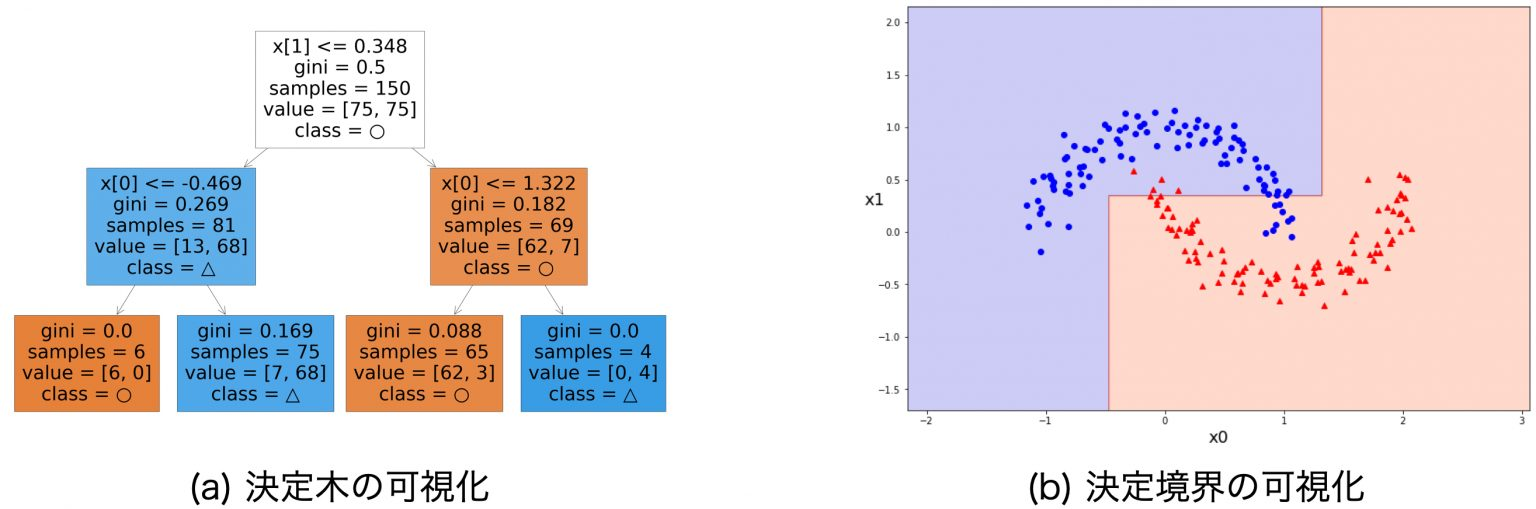

これら二つの可視化には次のような目的があります。

    決定木の可視化：モデルの判断根拠・重要な特徴量を調べる
    決定境界の可視化：モデルの予測結果の全体像を調べる

## 決定木の可視化
まずは学習によって作成された決定木の可視化を行います。決定木の可視化によって、モデルの予測フローや、重要と判断された特徴量を視覚的に把握することができます。

決定木の可視化は sklearn.tree モジュールを使って、次のように行います。



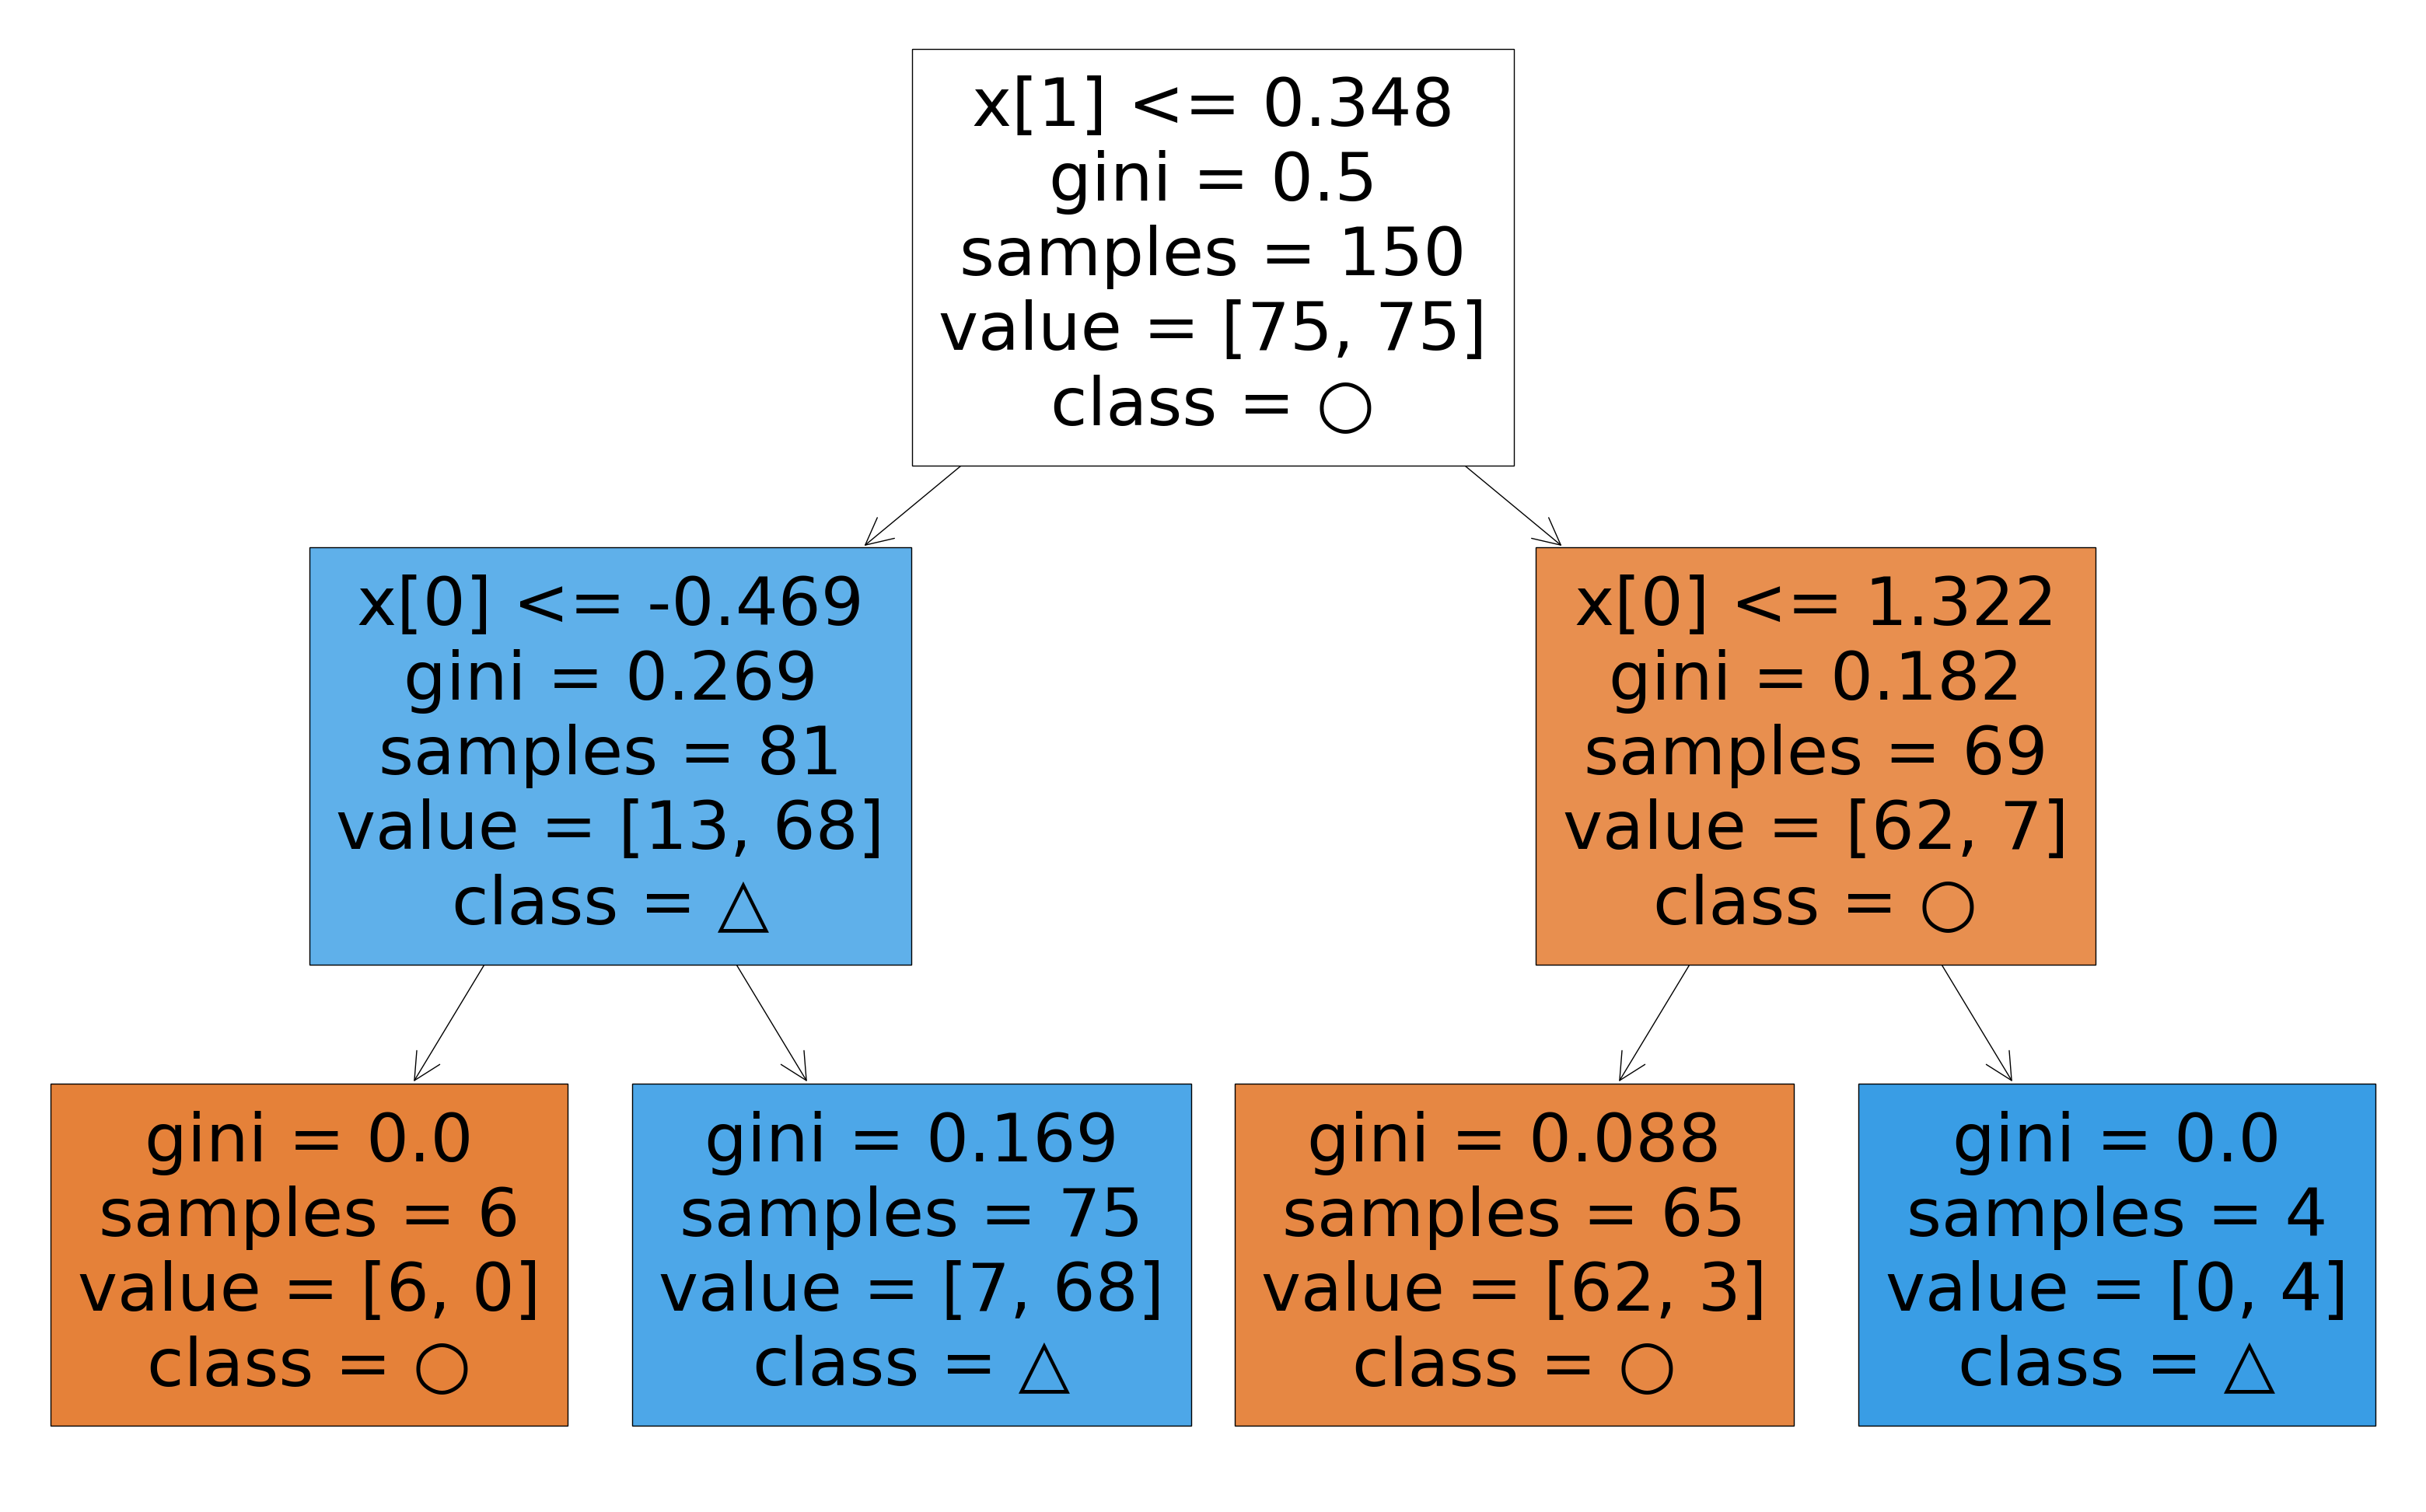

In [8]:
# モジュールのインポート
import sklearn.tree

# 決定木を可視化
plt.figure(figsize=(40, 25))
sklearn.tree.plot_tree(tree_2, # モデルの名前
                       class_names=['○', '△'], # クラス名
                       filled=True # 色付きで表示
                       );

コード内の '○' と '△' は、上の図の●型の点と▲型の点にそれぞれ対応しています。実行すると次の図を得ることができます。

この図は上から順に条件分岐する木を表しています。四角いブロックが矢印で繋がれた形をしており、各ブロックは条件が分岐するポイントです。一般的には、ブロックではなくノード、節点と呼びます。本記事ではノードという呼び方を使います。

いま表示した図について詳しく見ていきましょう。下図の緑で囲った部分に、分岐の条件が書かれています。

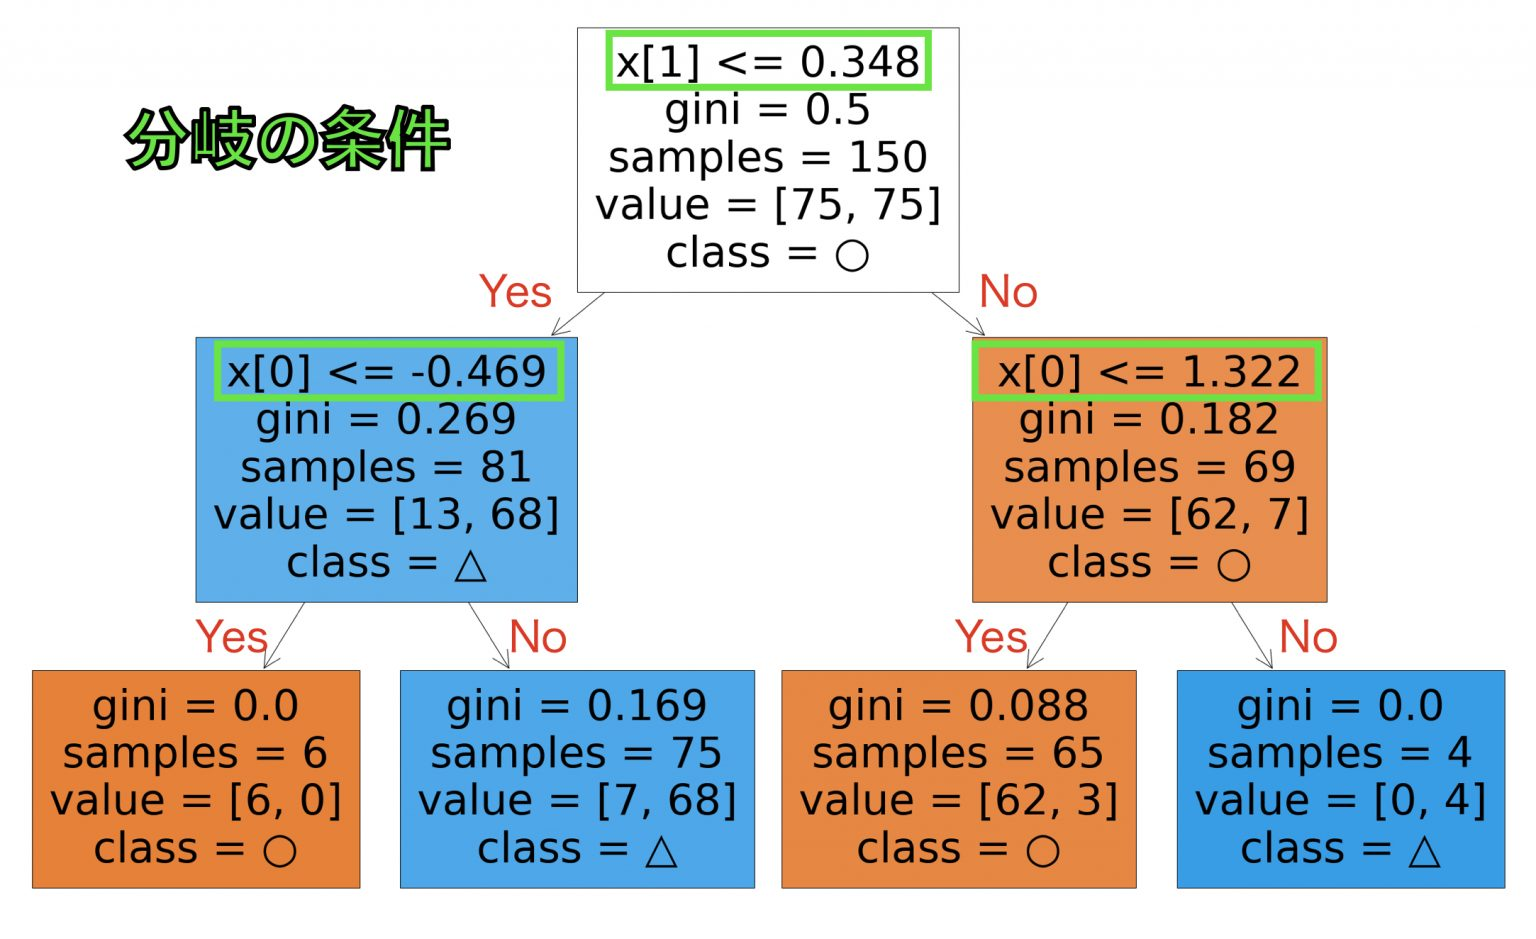

条件が満たされている場合は左へ、満たされない場合は右へ分岐します。例えば、入力データとして [0.79, 0.50] が入力されたとすると、次のように分岐していきます。

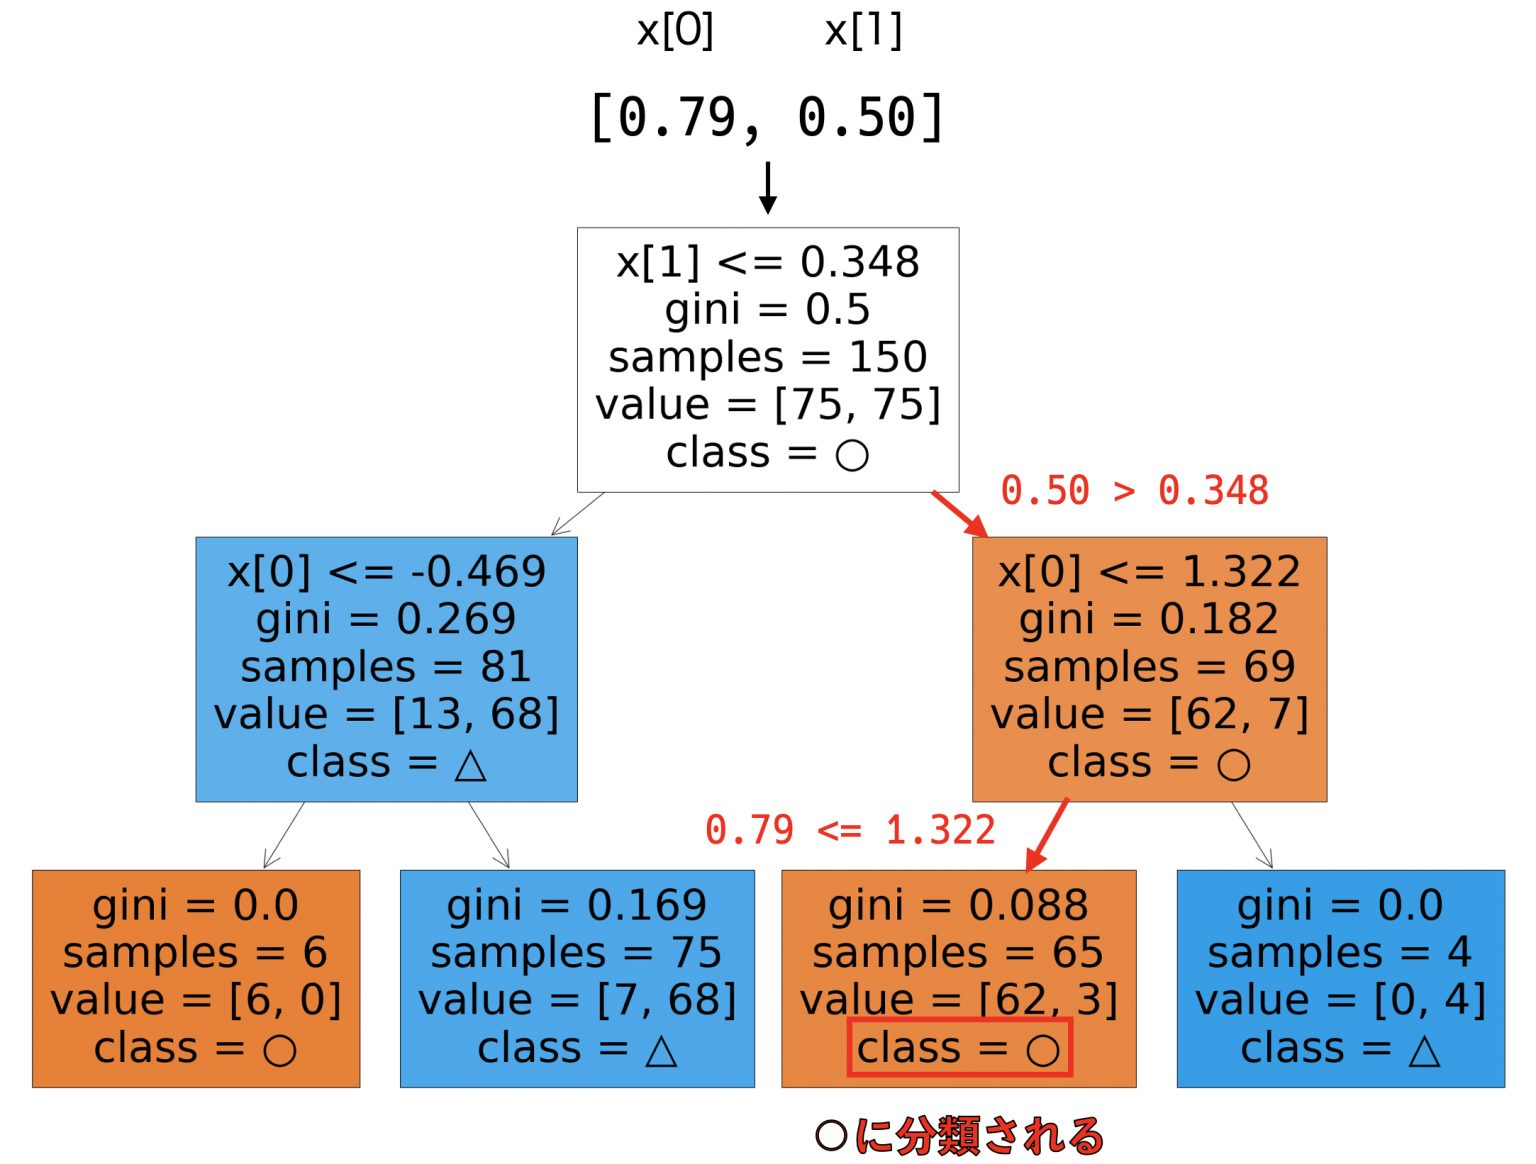

木の最下部まで行き着いたところで、class = ○ という部分に注目してください。class = ○ は、このノードに行き着いたデータが ○ クラスに分類されることを表現しています。

ノードに書かれている他の情報についても簡潔に説明します。

    gini: ジニ係数。そのノードに行き着くデータの純度を表しています。
    samples: サンプル数。学習データに含まれるサンプルがそのノードに何個行き着くかを表しています。
    value: 値。value=[62, 3] の場合、そのノードに行き着いた学習サンプルのうち、62 サンプルが ○ クラス、3 サンプルが △ クラスに属することを表しています。

決定木を可視化することで、モデルの判断基準を俯瞰してみることができます。これは決定木の特長です。決定木のように、予測の根拠が見えやすいモデルをホワイトボックスモデルといいます。

例えば、特徴量としてECサイトのユーザ行動データ、ラベルとして会員登録の有無を用意して決定木を作れば、「どのようなユーザ行動が会員登録に繋がるか」のヒントを得ることができるでしょう。このように、決定木は予測モデルとして使うだけでなく、モデルについて調べることでデータ解釈のヒントを与えてくれます。

## 補足
特徴量の値とクラスの対応についてより詳細に描画できる dtreeviz もおすすめです。

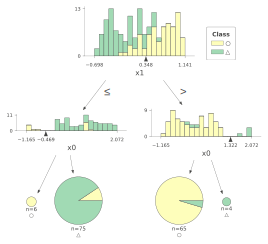

In [9]:
import dtreeviz

viz_model = dtreeviz.model(tree_2,
               x_train,
               t_train,
               target_name='Class',
               feature_names=['x0', 'x1'],
               class_names=['○', '△'])

viz_model.view(scale=0.8)

## 決定境界の可視化
次に、予測結果を俯瞰するために決定境界の可視化を行います。決定境界の可視化によって、モデルが予測ミスをしている箇所や、学習データに過剰適合している箇所を視覚的に把握することができます。

可視化は次のコードで行います。

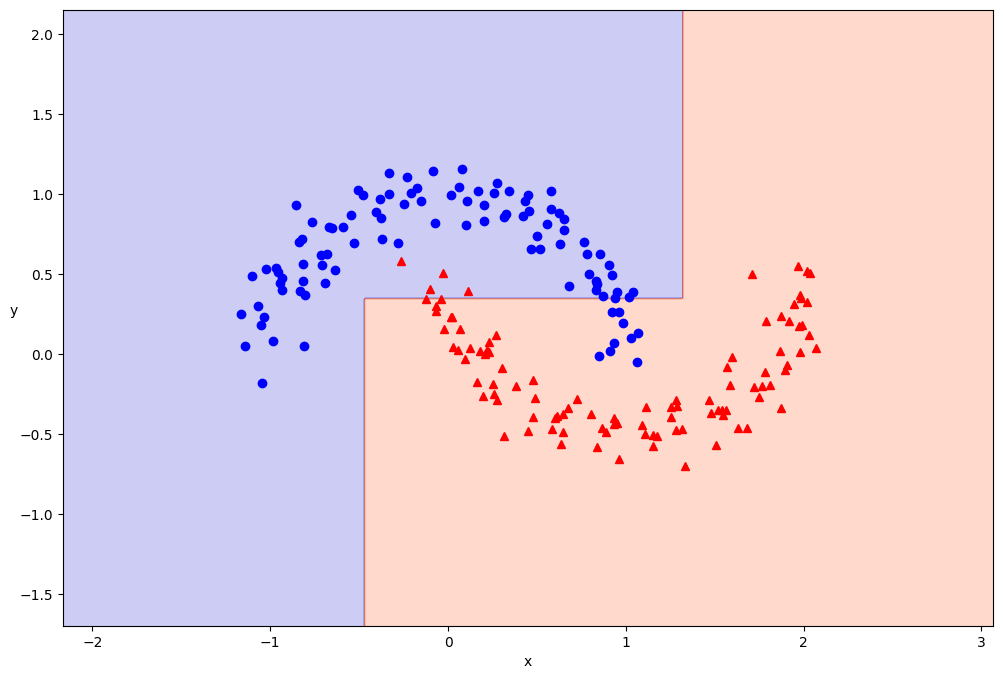

In [10]:
# 決定境界の可視化
def plot_decision_boundary(model, x, t):
    # サンプルデータのプロット
    plt.plot(x[:, 0][t==0], x[:, 1][t==0], 'bo')
    plt.plot(x[:, 0][t==1], x[:, 1][t==1], 'r^')
    plt.xlabel('x') # x 軸方向に x を表示
    plt.ylabel('y', rotation=0) # y 軸方向に y を表示

    # 描画範囲の設定
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1

    # 用意した間隔を使用してグリッドを作成
    _x, _y = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                                   np.arange(x2_min, x2_max, 0.01))

    # 多次元配列の結合
    xy = np.array([_x.ravel(), _y.ravel()]).T

    # 予測結果を算出し、分類境界線を図示
    y_pred = model.predict(xy).reshape(_x.shape)
    custom_cmap = ListedColormap(['mediumblue', 'orangered'])
    plt.contourf(_x, _y, y_pred, cmap=custom_cmap, alpha=0.2)

plt.figure(figsize=(12, 8))
plot_decision_boundary(tree_2, x, t)

決定境界を可視化できました。94% の正解率は良い精度に感じましたが、可視化してみるとうまく分類できていないところがありそうです。

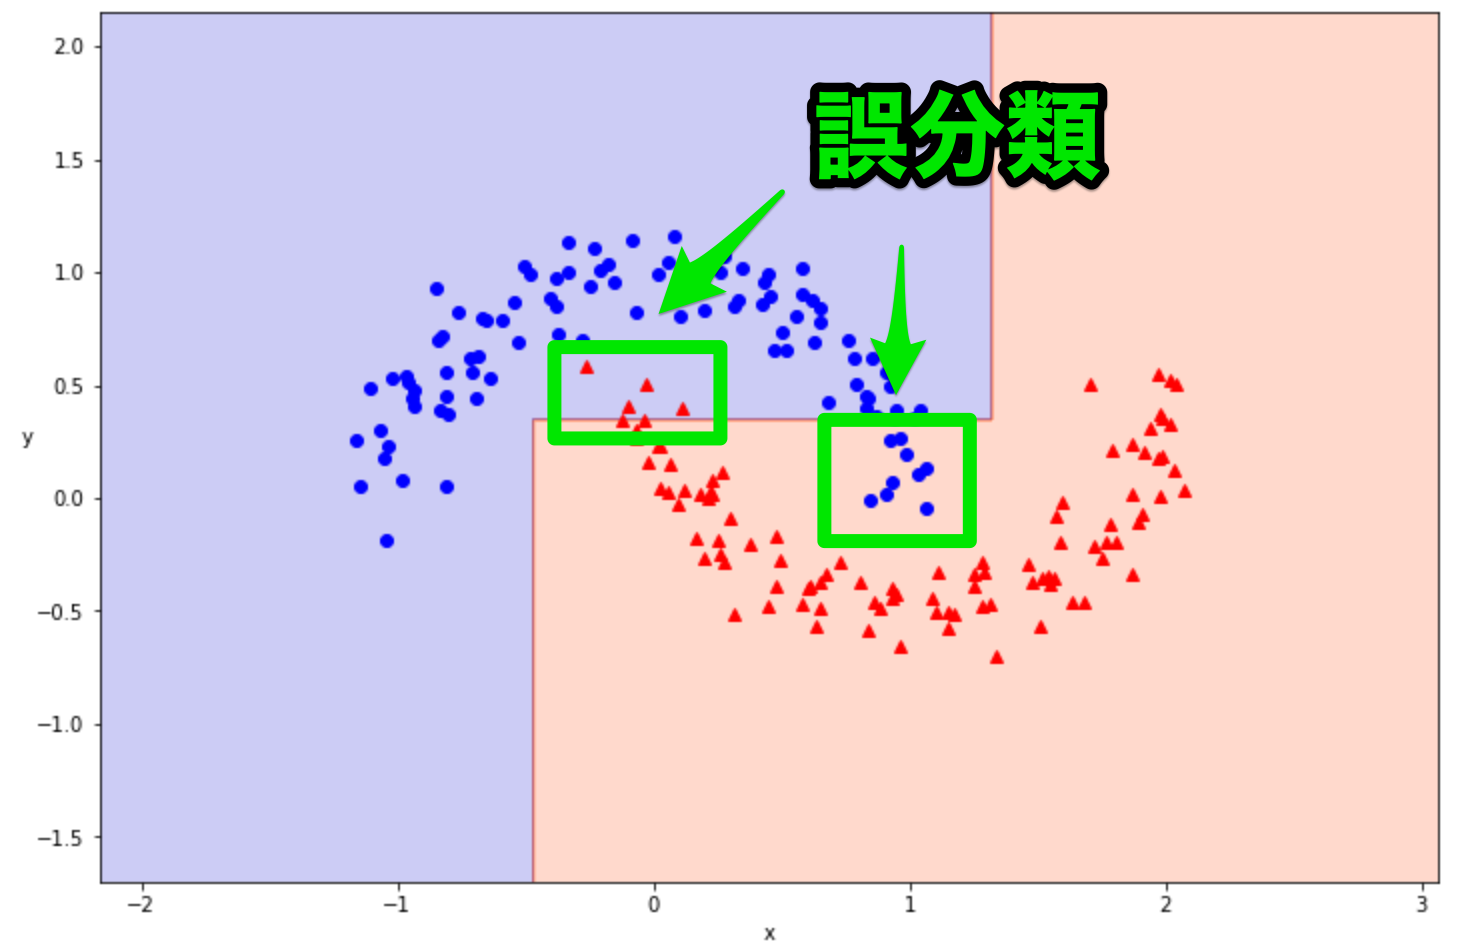

今回は max_depth=2 にして条件分岐の回数を減らしていたため、うまく学習ができなかった可能性が高いです。次は max_depth=6 に変更して、再度学習と結果の可視化を行ってみましょう。

## モデルの条件を変えて、再度結果を可視化
max_depth を 2 から 6 へ変更し、再度、決定木の学習を行います。まずはモデルの学習とテストデータに対する正解率を確認します。

In [11]:
# モデルを定義
tree_6 = DecisionTreeClassifier(max_depth=6, random_state=0) # 2 -&gt; 6 へ変更

# モデルの学習
tree_6.fit(x_train, t_train)

# テストデータで正解率の確認
tree_6.score(x_test, t_test)

1.0

正解率が 100% になりました！max_depth=2 のときよりも精度が向上しています！それではこちらも可視化してみましょう。

可視化には先程、定義した plot_decision_boundary() 関数を使用します。

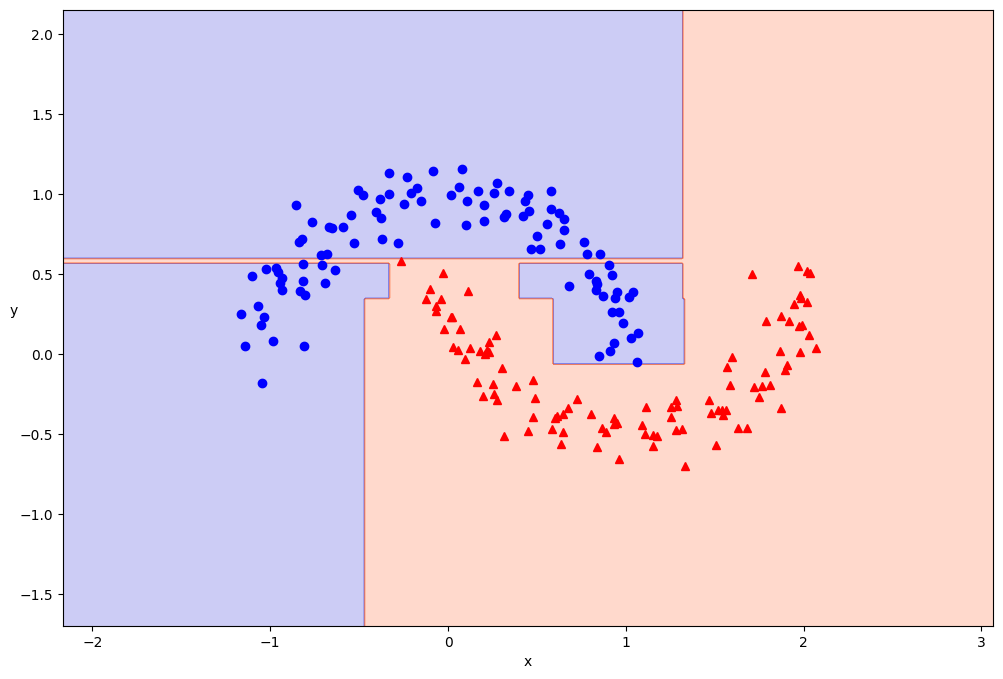

In [12]:
# 決定境界を可視化
plt.figure(figsize=(12, 8))
plot_decision_boundary(tree_6, x, t)

決定境界を可視化できました。100% の正解率はとてもよかったのですが、可視化の結果を見てみると、違和感のある学習の仕方をしていることがわかります。

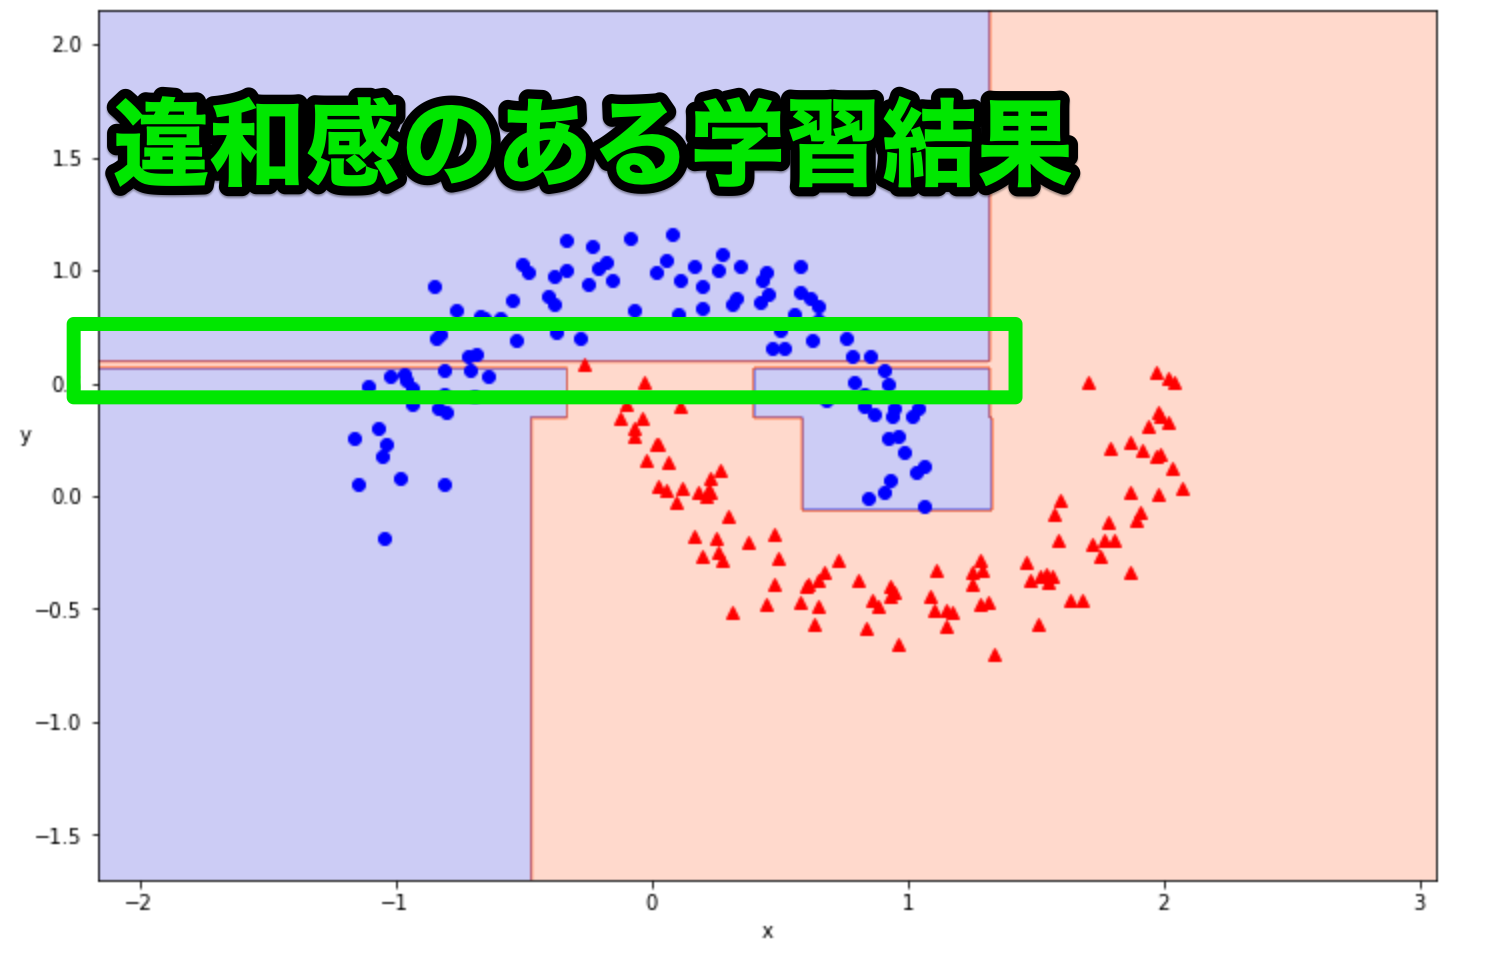

上図の細く赤い領域は、青い領域になっていた方が汎用性の高い分類方法となりそうです。このように、用意したデータに過剰に適合してしまう状況のことを過学習と呼びます。

過学習を防ぐためには、先程変更した max_depth のような人間側で設定できる値（ハイパーパラメータと呼びます）を調整したり、アルゴリズム自体を変える作業等が必要となります。

## 参考：決定木の発展的手法
本記事では可視化がテーマなのでシンプルな決定木を使っていますが、実務や研究では、決定木の発展形であるランダムフォレストや勾配ブースティング決定木もよく使われます。

これらは、いずれも決定木にアンサンブル学習を掛け合わせたものです。アンサンブル学習はひとつの問題に対して複数のモデルで学習する手法で、単一モデルよりも予測性能が高くなる場合が多いです。一方で、複数のモデルを利用することから、予測根拠は解釈しにくくなります。

ランダムフォレストは sklearn に実装されているので、こちらを参照してください。また、勾配ブースティング決定木の Python パッケージとしては、XGBoost や LightGBM が使いやすいです。

シンプルな決定木はデータ理解の助けとして非常に有用ですが、予測性能をより重視する場合はこれらの手法を検討してみてください！

## ポイント
    ランダムフォレスト、勾配ブースティング決定木は決定木の発展的手法
    いずれも決定木にアンサンブル学習を取り入れたもの
    予測性能は改善しやすく、一方で解釈しづらくなる


## 最後に : 学習結果のまとめ
今回の結果をまとめておきます。

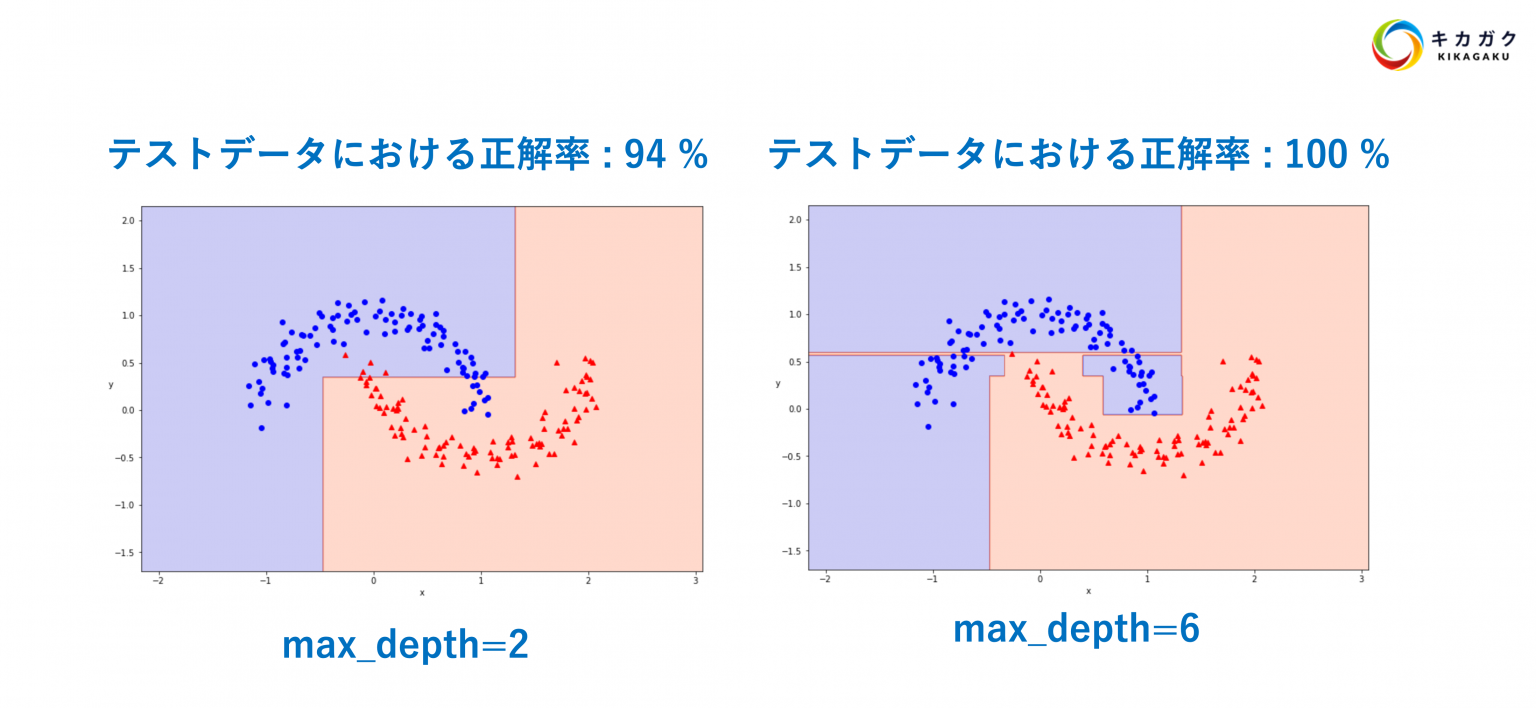

いかがでしょうか。精度だけ見ると、正解率 100% のモデルはとても優れているように見えますが、可視化してみると少し変な予測をしていることがわかります。

このように結果を可視化してみるだけでもアルゴリズムの挙動を把握できますので、余力のある方は他のアルゴリズムでも試してみてください！